In [1]:
import sys
sys.path.append('src/')
sys.path.append('scripts/')

In [2]:
import os
import torchvision.datasets as datasets
import torch
import torch
import logging
from pythae.models import LVAE_IAF, LVAE_IAF_Config, AutoModel
from pythae.trainers import BaseTrainerConfig, BaseTrainer
import argparse
import numpy as np
import matplotlib.pyplot as plt

from utils import Encoder_ColorMNIST, Encoder_Chairs, Decoder_ColorMNIST, Decoder_Chairs, Encoder_Faces, Decoder_Faces, My_Dataset, My_MaskedDataset, make_batched_masks

In [3]:
!ls

animation.gif	   latent.ipynb  plots		 requirements.txt  setup.py
dummy_output_dir   MANIFEST.in	 pyproject.toml  scripts	   src
experiments.ipynb  my_data	 README.md	 setup.cfg


In [3]:
train_data = torch.load(os.path.join('my_data/sprites/Sprites_train.pt'))[:-1000]
eval_data = torch.load(os.path.join('my_data/sprites/Sprites_train.pt'), map_location="cpu")[-1000:]
test_data = torch.load(os.path.join('my_data/sprites/Sprites_test.pt'), map_location="cpu")
print(train_data.shape)
train_data = train_data.permute(0, 1, 4, 2, 3)
eval_data = eval_data.permute(0, 1, 4, 2, 3)
test_data = test_data.permute(0, 1, 4, 2, 3)
print(train_data.shape)

torch.Size([8000, 8, 64, 64, 3])
torch.Size([8000, 8, 3, 64, 64])


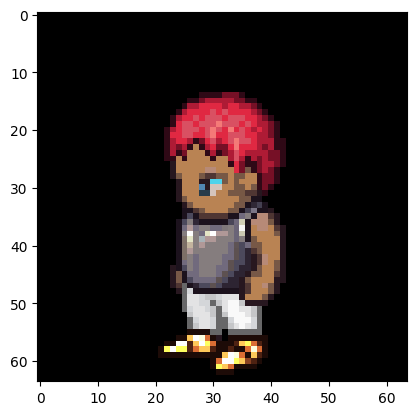

In [4]:
plt.imshow(train_data[0, 0].permute(1, 2, 0))

In [5]:
input_dim = (3, 64, 64)
latent_dim = 16
beta = 1
n_hidden_in_made = 3
n_made_blocks = 2
warmup = 10
context_dim = None
prior = 'vamp'
posterior = 'iaf'
vamp_number_components= 500
linear_scheduling_steps = 10
num_epochs = 200
batch_size = 64
learning_rate=  1e-3 
steps_saving = None
steps_predict = 100
shuffle_data = True


In [6]:
config = LVAE_IAF_Config(
    input_dim=input_dim,
    n_obs_per_ind=train_data.shape[1],
    latent_dim=latent_dim,
    beta=beta,
    n_hidden_in_made=n_hidden_in_made,
    n_made_blocks=n_made_blocks,
    warmup=warmup,
    context_dim=context_dim,
    prior=prior,
    posterior=posterior,
    vamp_number_components=vamp_number_components,
    linear_scheduling_steps=linear_scheduling_steps
)

training_config = BaseTrainerConfig(
        num_epochs=num_epochs,
        learning_rate=learning_rate,
        batch_size=batch_size,
        steps_saving=steps_saving,
        steps_predict=steps_predict,
        shuffle=shuffle_data
    )

In [8]:
encoder = Encoder_Chairs(config)
decoder = Decoder_Chairs(config)

model = LVAE_IAF(config, encoder, decoder).to('cuda')

model.load_state_dict(torch.load('dummy_output_dir/LVAE_IAF_training_2024-05-01_17-22-06/final_model/model.pt')['model_state_dict'])

model


LVAE_IAF(
  (decoder): Decoder_Chairs(
    (fc): Linear(in_features=16, out_features=2048, bias=True)
    (layers): Sequential(
      (0): ConvTranspose2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): ResBlock(
        (conv_block): Sequential(
          (0): ReLU()
          (1): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (2): ReLU()
          (3): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1))
        )
      )
      (2): ResBlock(
        (conv_block): Sequential(
          (0): ReLU()
          (1): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (2): ReLU()
          (3): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1))
        )
      )
      (3): ResBlock(
        (conv_block): Sequential(
          (0): ReLU()
          (1): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (2): ReLU()
          (3): Conv2d(32, 128, kernel_size=(1, 1), stride=(1, 1))
       

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([8, 3, 64, 64])


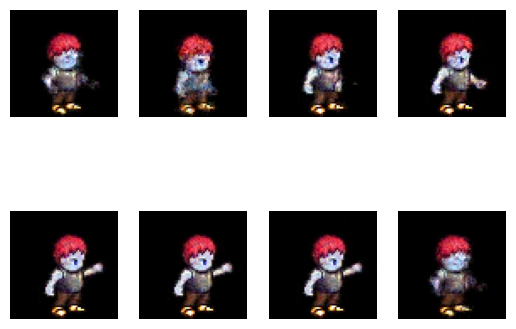

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


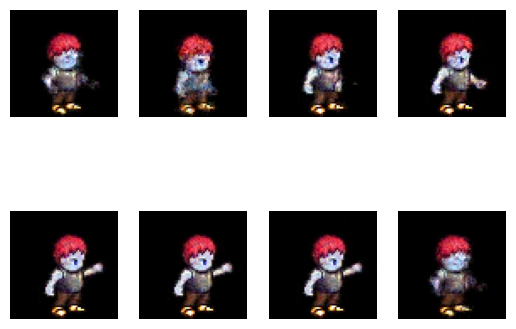

In [10]:
torch.manual_seed(53)
z = torch.randn((1, latent_dim))
z2 = z.clone()
model.to('cpu')
out, z_seq1 = model.generate(z)
out = out.squeeze(0)
out2, z_seq2 = model.generate(z2)
out2 =out2.squeeze(0)
print(out.shape)
for i in range(model.n_obs):
    plt.subplot(2, model.n_obs//2, i+1)
    img = out[i].detach().cpu().numpy()
    plt.imshow(img.transpose(1, 2, 0))
    plt.axis('off')
plt.show()
for i in range(model.n_obs):
    plt.subplot(2, model.n_obs//2, i+1)
    img = out2[i].detach().cpu().numpy()
    plt.imshow(img.transpose(1, 2, 0))
    plt.axis('off')
plt.show()


In [ ]:
def tensor_to_gif(out, filename = 'animation.gif'):
    from PIL import Image
    import matplotlib.animation as animation
    images_np = out.cpu().detach().numpy()

    # Convert numpy array to list of PIL images
    images_pil = [Image.fromarray(np.uint8(( (img.transpose((1, 2, 0)) - img.max()) /  (img.max() - img.min()) ) * 255)) for img in images_np]

    # Create and save the GIF
    gif_path = "animation.gif"
    images_pil[0].save(gif_path, save_all=True, append_images=images_pil[1:], duration=200, loop=0)

In [11]:
from sklearn.manifold import TSNE

encoding done
tsne done


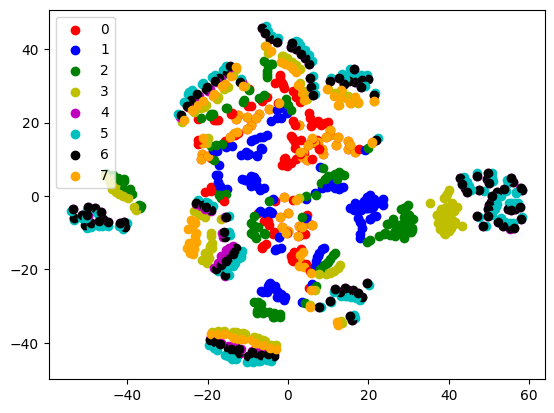

In [33]:
tsne = TSNE(n_components=2, random_state=0)
z = model.encoder(train_data).embedding[:1000, :]
print('encoding done')
z = z.detach().cpu().numpy()
z = tsne.fit_transform(z)
print('tsne done')


for i in range(1000):
    if i % 8 == 0:
        plt.scatter(z[i, 0], z[i, 1], c='r')
    elif i % 8 == 1:
        plt.scatter(z[i, 0], z[i, 1], c='b')
    elif i % 8 == 2:
        plt.scatter(z[i, 0], z[i, 1], c='g')
    elif i % 8 == 3:
        plt.scatter(z[i, 0], z[i, 1], c='y')
    elif i % 8 == 4:
        plt.scatter(z[i, 0], z[i, 1], c='m')
    elif i % 8 == 5:
        plt.scatter(z[i, 0], z[i, 1], c='c')
    elif i % 8 == 6:
        plt.scatter(z[i, 0], z[i, 1], c='k')
    else:
        plt.scatter(z[i, 0], z[i, 1], c='orange')

plt.legend(['0', '1', '2', '3', '4', '5', '6', '7'])  
plt.show()

kmeans done


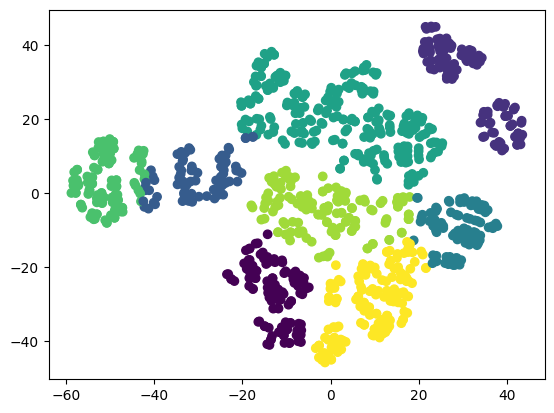

In [37]:
from sklearn.mixture import GaussianMixture

GM = GaussianMixture(n_components=8).fit(z)
print('kmeans done')

labels = GM.predict(z)

plt.scatter(z[:, 0], z[:, 1], c=labels)
plt.show()



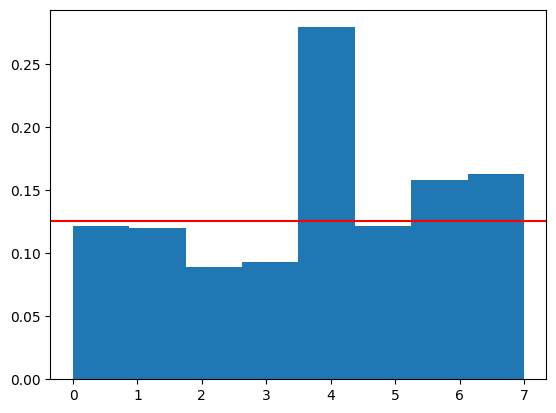

In [41]:
plt.hist(labels, bins=8, density=True)
plt.axhline(0.125, color='r')